# **LINEAR REGRESSION**

In the last lab, you learn't about the Exploratory Data Analysis (EDA) which have a lot of importance before performing any task on the data. Afterwards, you did linear regression using the Ordinary Least Squares (OLS) method.

In this lab, you would perform **Linear Regression** on various datasets using **Gradient Descent** Method.

**DATA SETS**

From your last lab's knowledge you know that any dataset from real world can be imported as a **Dataframe** and be processed on.

But, this time direclty import the datasets from the scikit module.
Yes, scikit-learn has some inbuilt-datasets too. These however are small datasets for experimentations and learning as you would do now.

---
Refer the following links to import the respective datasets

[**Diabetes Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

[**California Housing Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)


**TASK 1**:



1.   Import these Datasets in your notebook.
2.   Treat the last column of the datasets as the Depedent Variable (Y) with the other columns as Independent variables.
1.  Do the sufficient EDA as per your needs with justifiable reasonings.







In [11]:
#importing all necessary modules 
import sklearn as sk
import matplotlib
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [21]:
df_partone = load_diabetes(return_X_y=True, as_frame=True)

In [25]:
# df1_partone = df_partone.data
# df1_partone['target'] = df_partone.target 

In [27]:
df1_partone.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [31]:
df1_partone.shape

(442, 11)

**TASK 2**:


1.   Split the data into Train (85%) and Test Set (15%).




In [35]:
#importing necessary stuff for this task 
from sklearn.model_selection import train_test_split as tt

In [37]:
X_diabetes = df1_partone.drop(['target'], axis = 'columns')
Y_diabetes = df1_partone['target']

In [41]:
xtrain_diabetes, xtest_diabetes, ytrain_diabetes, ytest_diabetes = tt(X_diabetes, Y_diabetes, test_size = 0.15, random_state = 42)

In [43]:
xtrain_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
388,0.052606,0.050680,-0.024529,0.056301,-0.007073,-0.005072,-0.021311,-0.002592,0.026717,-0.038357
374,-0.107226,-0.044642,-0.034229,-0.067642,-0.063487,-0.070520,0.008142,-0.039493,-0.000612,-0.079778
25,-0.067268,0.050680,-0.012673,-0.040099,-0.015328,0.004636,-0.058127,0.034309,0.019196,-0.034215
185,-0.074533,0.050680,-0.018062,0.008101,-0.019456,-0.024800,-0.065491,0.034309,0.067318,-0.017646
203,-0.001882,0.050680,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025395,0.027917


In [45]:
xtrain_diabetes.shape

(375, 10)

In [47]:
xtest_diabetes.shape

(67, 10)

In [49]:
ytrain_diabetes.head()

388    110.0
374    140.0
25     202.0
185    101.0
203    222.0
Name: target, dtype: float64

In [51]:
ytrain_diabetes.shape

(375,)

In [53]:
ytest_diabetes.shape

(67,)

**TASK 3**


1.   Implement a Linear Regression Model with Stochastic Gradient Descent Method.
2.   The implementation of the stochastic gradient descent method should be as per the method taught in the theory class. Make sure the update rule's implementation should be done by you **(No inbuilt direct function should be used for this task).**
3.   Try different values of the learning rates and epochs. Understand their effects on the training process.
4.   Make sure to have multiple 2D plots for the loss function w.r.t. Iterations and Epochs for different learning rates.



In [55]:
import matplotlib.pyplot as plt

In [61]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias
# Compute Mean Squared Error (MSE)
def compute_loss(X, Y, weights, bias):
    y_pred = np.dot(X, weights) + bias
    loss = np.mean((Y - y_pred) ** 2)
    return loss

In [63]:
def stochastic_gradient_descent(X, Y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights, bias = initialize_weights(n_features)
    
    loss_history = []  # Store loss values for plotting

    for epoch in range(epochs):
        for i in range(n_samples):
            xi = X[i]
            yi = Y[i]
            
            # Prediction
            y_pred = np.dot(xi, weights) + bias
            
            # Compute gradients
            error = y_pred - yi
            dW = xi * error
            dB = error
            
            # Update weights and bias
            weights -= learning_rate * dW
            bias -= learning_rate * dB
            
        # Compute loss after each epoch
        loss = compute_loss(X, Y, weights, bias)
        loss_history.append(loss)

    return weights, bias, loss_history


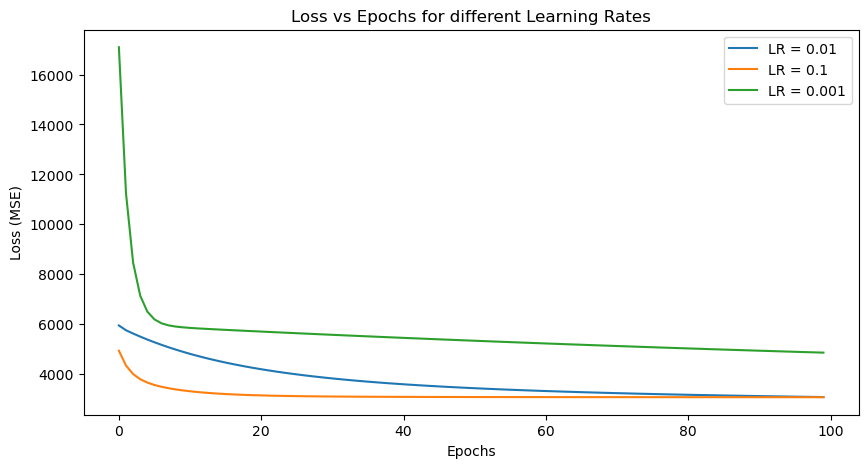

In [79]:
learning_rates = [0.01, 0.1, 0.001]
epochs = 100
plt.figure(figsize=(10, 5))

for lr in learning_rates:
    _, _, loss_hist = stochastic_gradient_descent(xtrain_diabetes.values, ytrain_diabetes.values, learning_rate=lr, epochs=epochs)
    plt.plot(range(epochs), loss_hist, label=f'LR = {lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Epochs for different Learning Rates')
plt.legend()
plt.show()

**TASK 4**:
  

1.   Test the above model on the Test set as already split above.
2.   Report the final performance metrics (RMSE, MAE,R² ).



In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

In [83]:
weights, bias, _ = stochastic_gradient_descent(xtrain_diabetes.values, ytrain_diabetes.values, learning_rate=0.01, epochs=200)
y_pred = predict(xtest_diabetes.values, weights, bias)

rmse = np.sqrt(mean_squared_error(ytest_diabetes.values, y_pred))
mae = mean_absolute_error(ytest_diabetes.values, y_pred)
r2 = r2_score(ytest_diabetes.values, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 55.9270
Mean Absolute Error (MAE): 44.1979
R² Score: 0.4274


In [99]:
# we can also compute for different epochs 
results = []
for epochs in [50, 100, 200, 250, 300, 350, 400, 450, 500]:
    weights, bias, _ = stochastic_gradient_descent(xtrain_diabetes.values, ytrain_diabetes.values, learning_rate=0.01, epochs=epochs)
    y_pred = np.dot(xtest_diabetes.values, weights) + bias
    
    rmse = np.sqrt(mean_squared_error(ytest_diabetes.values, y_pred))
    mae = mean_absolute_error(ytest_diabetes.values, y_pred)
    r2 = r2_score(ytest_diabetes.values, y_pred)
    
    results.append([epochs, rmse, mae, r2])
df_results_diabetes = pd.DataFrame(results, columns=['epochs', 'rmse', 'mae', 'r^2'])
df_results_diabetes

,epochs,rmse,mae,r^2
0,50,58.072886,47.465601,0.382650
1,100,56.315298,45.061619,0.419453
2,200,55.927006,44.197917,0.427431
3,250,55.982873,44.244391,0.426287
4,300,56.048701,44.262819,0.424937
5,350,56.104532,44.270973,0.423791
6,400,56.147606,44.288405,0.422905
7,450,56.179836,44.295916,0.422243
8,500,56.203838,44.298030,0.421749


**TASK 5**:
  

1.   Do the same once again, but this time use the inbuilt gradient descent algorithm (**SGDRegressor**).
2.   And compare the performance metrics (RMSE, MAE, R² ) with your own implementation of Gradient Descent as attained above.



In [95]:
from sklearn.linear_model import SGDRegressor

results2 = []
for epochs in [50, 100, 200, 250, 300, 350, 400, 450, 500]:
    sgd = SGDRegressor(max_iter=epochs, learning_rate='constant', eta0=0.01, random_state=42)
    sgd.fit(xtrain_diabetes, ytrain_diabetes)
    y_pred_sklearn = sgd.predict(xtest_diabetes)

    RMSE_SGDRegressor_diabetes = np.sqrt(mean_squared_error(ytest_diabetes, y_pred_sklearn))
    MAE_SGDRegressor_diabetes =  mean_absolute_error(ytest_diabetes, y_pred_sklearn)
    R2_SGDRegressor_diabetes =  r2_score(ytest_diabetes, y_pred_sklearn)
    results2.append([epochs, RMSE_SGDRegressor_diabetes, MAE_SGDRegressor_diabetes, R2_SGDRegressor_diabetes])

df_inbuilt_diabetes = pd.DataFrame(results2, columns = ['epochs', 'rmse', 'mae', 'r^2'])
# results2.columns = ['epochs', 'rmse', 'mae', 'r^2'] 
df_inbuilt_diabetes

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,epochs,rmse,mae,r^2
0,50,58.134603,47.923770,0.381337
1,100,56.286799,45.355818,0.420041
2,200,56.066588,45.116234,0.424570
3,250,56.066588,45.116234,0.424570
4,300,56.066588,45.116234,0.424570
5,350,56.066588,45.116234,0.424570
6,400,56.066588,45.116234,0.424570
7,450,56.066588,45.116234,0.424570
8,500,56.066588,45.116234,0.424570


**TASK 6**:


1.   The above tasks should be done for both the datasets as imported in *Task 1*.
2.   And, you must analyze the difference in the results that you get in *Task 4* and *Task 5*.



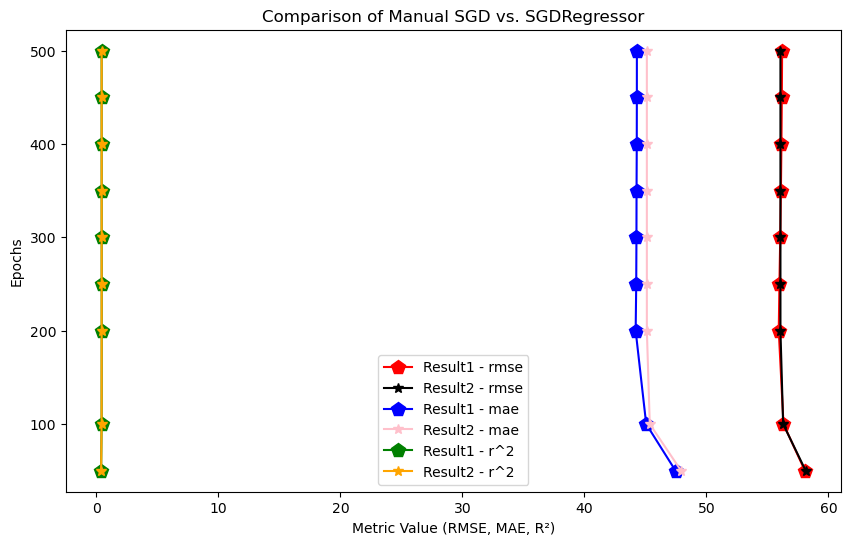

In [125]:
plt.figure(figsize=(10, 6))
metrics = ['rmse', 'mae', 'r^2']
colors = ['red', 'blue', 'green']
colors2 = ['black', 'pink', 'orange']
marker = 'p'
marker2 = '*'
for i, metric in enumerate(metrics):
    plt.plot(df_results_diabetes[metric], df_results_diabetes['epochs'], label=f'Result1 - {metric}', 
             color=colors[i], marker=marker, markersize = 10)
    plt.plot(df_inbuilt_diabetes[metric], df_inbuilt_diabetes['epochs'], label=f'Result2 - {metric}', 
             color=colors2[i], marker=marker2, markersize = 7)

plt.xlabel("Metric Value (RMSE, MAE, R²)")
plt.ylabel("Epochs")
plt.title("Comparison of Manual SGD vs. SGDRegressor")
plt.legend()
plt.show()